### The dataset

The **Hotel Bookings** dataset typically contains information about hotel reservations, with data that can include details such as:

Booking Details:

Reservation status (e.g., canceled, checked-in, etc.)
Booking date
Length of stay (number of nights)
Number of guests (adults, children, babies)
Customer Information:

Whether the customer is a repeated guest
Customer origin (e.g., country)
Age or group type (e.g., number of adults, children)
Hotel Information:

Type of hotel (e.g., Resort or City hotel)
Special requests (e.g., high floor, adjacent rooms)
Stay Details:

Date of arrival and departure
Special requests (e.g., whether a customer needs a car parking space or has made a special request)

### Imports

In [62]:
!pip install -r ./requirements.txt

In [2]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")

### Data Analysis

#### Loading the dataset

In [3]:
df = pd.read_csv("./data/hotel_bookings.csv")

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Visualizations


**Histogram of the target feature:**

This plot shows the overall distribution of of the average daily rate. this chart is important because it gives an immediate sense of how the target feature behaves.
It helps us understand the range and frequency of ADR values and identify potential outliers.</br>
We can see that in most bookings the average daily rate is less than 500.

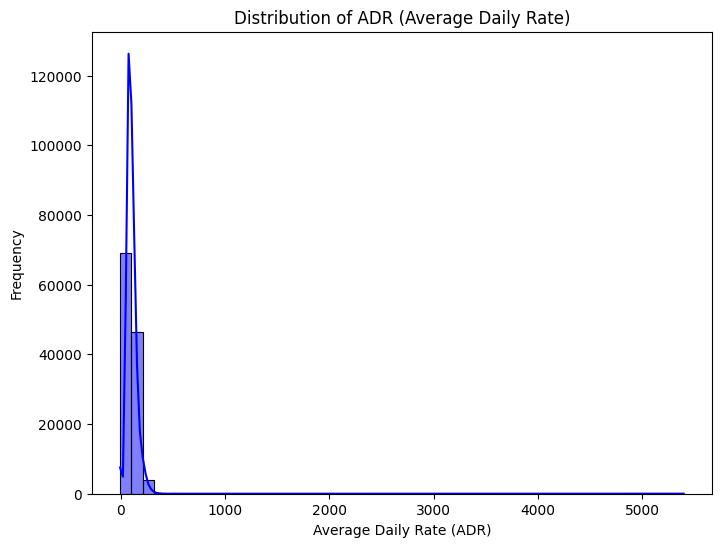

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(df['adr'], bins=50, kde=True, color='blue')
plt.title("Distribution of ADR (Average Daily Rate)")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Frequency")
plt.show()


**Correlations to the target feature:**

By examining this we can determine which features are most related to the target feature, and may affect the value of the target feature.<br/>
We can see that the "children" feature (number of children) has the highest correlation to the target feature.


In [6]:
non_string_columns = [col for col in df.columns if df[col].dtypes != "object"]
numeric_df = df[non_string_columns]

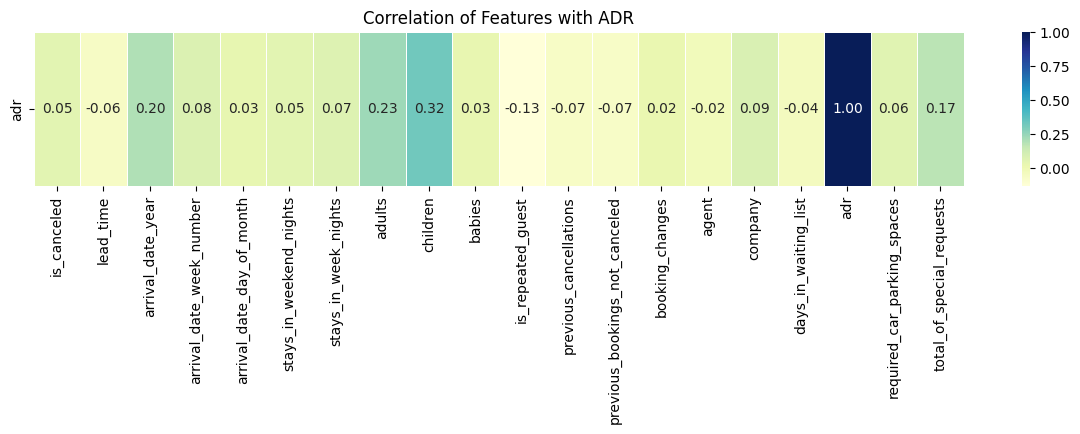

In [7]:
df_corr = numeric_df.corr(method="pearson").loc[["adr"]]

fig, ax = plt.subplots(figsize=(15,2))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)
plt.title("Correlation of Features with ADR")
plt.show()

**Children vs ADR visualization**:

Since we saw that the children feature is relatively highly correlated to the target feature, we would like to see a graph that shows the relation between them clearly.<br/>
We can use this feature to predict the target feature.<br/>
For example, we can see that as the number of children increases (within the possible range), the average daily rate increases

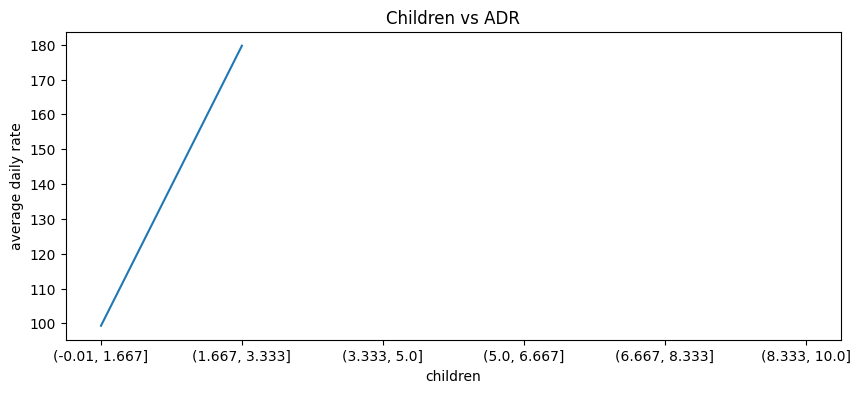

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
df.groupby(pd.cut(df['children'],6))['adr'].mean().plot(kind='line',ax=ax)

plt.title("Children vs ADR")
plt.ylabel("average daily rate")
plt.show()

**Reserved Room Type vs ADR visualization**:

The "reserved_room_type" feature is not included in the heatmap because it is categorical, but it is likely a significant factor influencing the average daily rate. As shown in the graph, the median ADR for room types H, F, and G is among the highest.

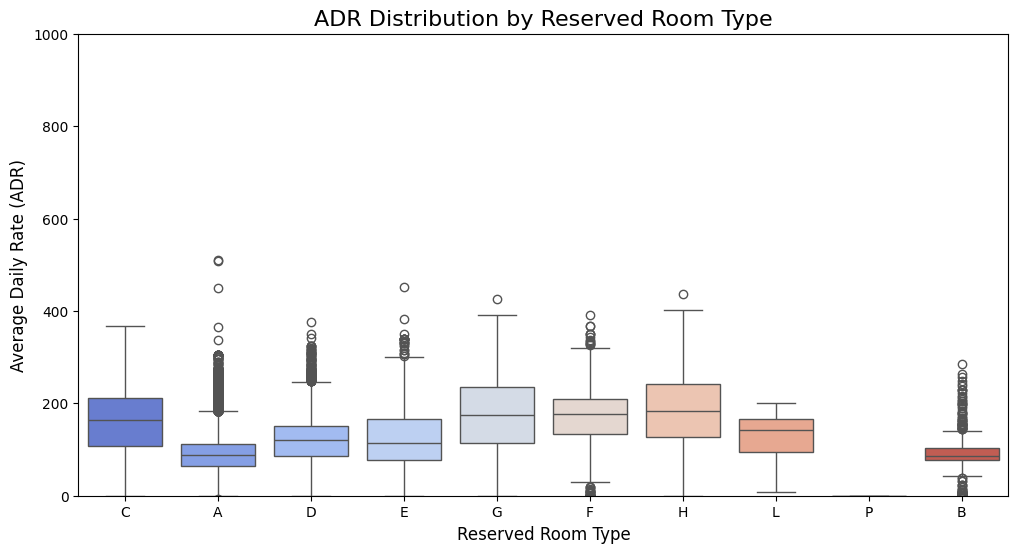

In [9]:
# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='reserved_room_type', y='adr', data=df, palette='coolwarm')

# Customize the plot
plt.title("ADR Distribution by Reserved Room Type", fontsize=16)
plt.xlabel("Reserved Room Type", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Limit the y-axis
plt.ylim(0, 1000)

# Show the plot
plt.show()

**Market Segment vs ADR visualization**:

We would like to examine also here a feature that does not appear in the heatmap above because its values ​​are not numeric, but with a high probability may be related to the target feature.<br>
We can see that some market segments, such as "Online Travel Agents" or "Direct" have higher averae daily rates.

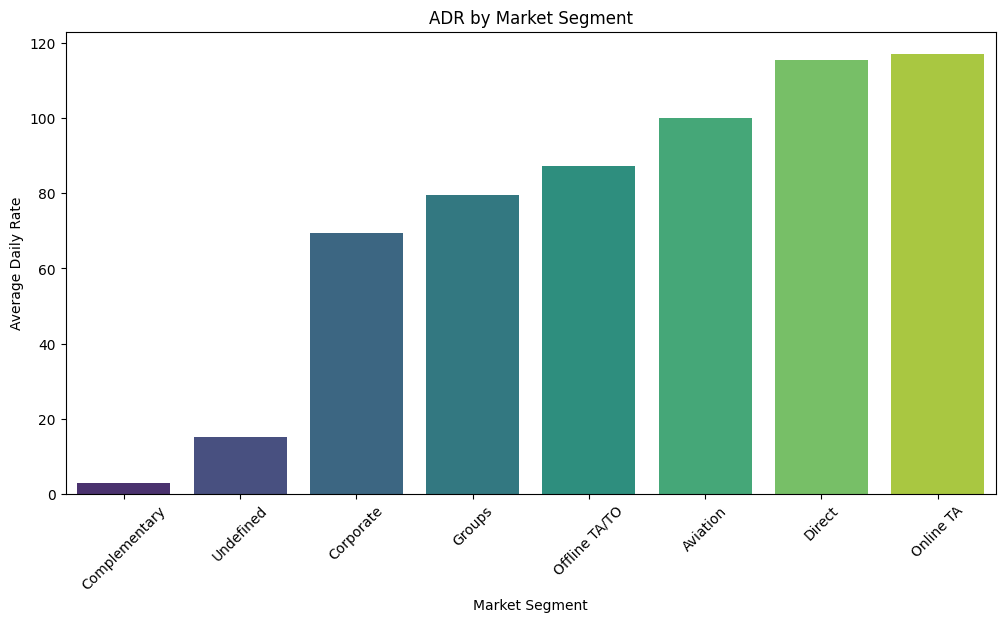

In [10]:
plt.figure(figsize=(12, 6))
market_cancellation = df.groupby('market_segment')['adr'].mean().sort_values()
sns.barplot(x=market_cancellation.index, y=market_cancellation.values, palette='viridis')
plt.title("ADR by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Daily Rate")
plt.xticks(rotation=45)
plt.show()

### Basic Model Pipeline

#### Preprocessing the data

We will check if there are null values ​​in the data set. We can see that the attributes containing null values ​​are categories, so we will create a new category for these values.

In [4]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [5]:
df['country'].fillna('Unknown', inplace=True)  # Fill with 'Unknown' for missing country
df['agent'].fillna(0, inplace=True)           # Fill with 0 for missing agent
df['company'].fillna(0, inplace=True)         # Fill with 0 for missing company

Ensure all categorical columns are one-hot encoded

In [13]:
df_processed = pd.get_dummies(df, drop_first=True)

print(df_processed.dtypes)

is_canceled                           int64
lead_time                             int64
arrival_date_year                     int64
arrival_date_week_number              int64
arrival_date_day_of_month             int64
                                      ...  
reservation_status_date_2017-09-08     bool
reservation_status_date_2017-09-09     bool
reservation_status_date_2017-09-10     bool
reservation_status_date_2017-09-12     bool
reservation_status_date_2017-09-14     bool
Length: 1176, dtype: object


Convert columns of 'bool' type to 'int' type:

In [14]:
df_processed = df_processed.astype({col: 'int64' for col in df_processed.select_dtypes(include=['bool']).columns})
print(df_processed.dtypes)

is_canceled                           int64
lead_time                             int64
arrival_date_year                     int64
arrival_date_week_number              int64
arrival_date_day_of_month             int64
                                      ...  
reservation_status_date_2017-09-08    int64
reservation_status_date_2017-09-09    int64
reservation_status_date_2017-09-10    int64
reservation_status_date_2017-09-12    int64
reservation_status_date_2017-09-14    int64
Length: 1176, dtype: object


Drop Irrelevant Non-Numeric Columns:

#### Split to Train and Test:

In [15]:
from sklearn.model_selection import train_test_split

See the target feature distributions:

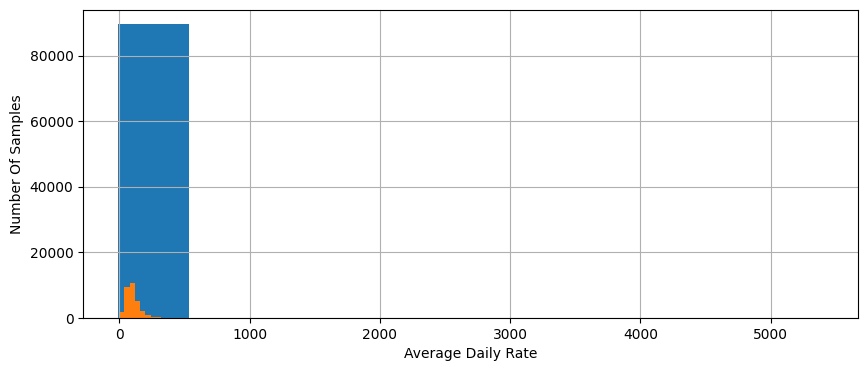

In [16]:
df_train, df_test = train_test_split(df_processed, test_size=0.25)
fig, ax = plt.subplots(figsize=(10,4))
df_train.adr.hist(ax=ax)
df_test.adr.hist(ax=ax)
plt.ylabel("Number Of Samples")
plt.xlabel("Average Daily Rate")
plt.show()


In [17]:
X_train = df_train.drop('adr',axis=1)
X_test = df_test.drop('adr',axis=1)

y_train = df_train['adr']
y_test = df_test['adr']


#### Train the XGBoost Regressor

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [19]:
# Evaluation metrics
def evaluate_model(y_true, y_pred, dataset_type="Test"):
    print(f"Evaluation Results ({dataset_type}):")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}\n")

In [20]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)


#### Evaluate how good is the model:

Compute the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R^2 Score.<br>We dont use MAPE, because for datasets where the target values (y) can be close to zero, MAPE can become unreliable because dividing by small numbers inflates the percentage error.


In [21]:
evaluate_model(y_test, y_pred, "Test")

Evaluation Results (Test):
Mean Absolute Error (MAE): 12.08
Mean Squared Error (MSE): 347.53
Root Mean Squared Error (RMSE): 18.64
R^2 Score: 0.85



Compute max error:

In [56]:
residuals = y_test - y_pred
max_error = residuals.abs().max()
print("Max Error:", "{:,.0f}".format(max_error))

Max Error: 640


### Error Analysis

**On which items the model performs the worst? The best?**

Plot the true values against the predicted values:

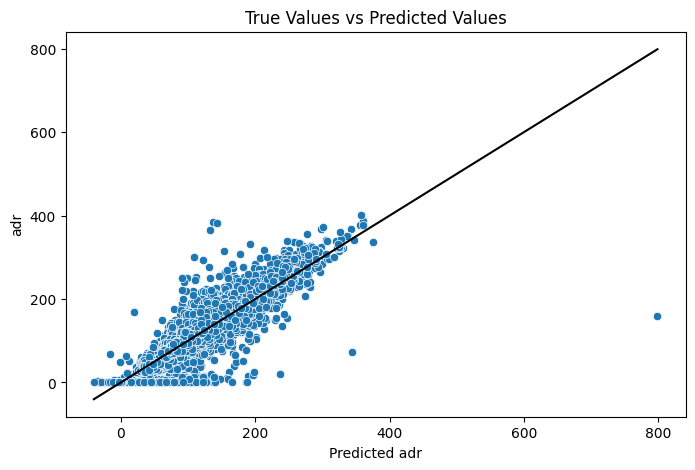

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=y_pred, y=y_test, ax=ax)
sns.lineplot(x=y_pred, y=y_pred, ax=ax, color='black')
plt.xlabel("Predicted adr")
plt.title("True Values vs Predicted Values")
plt.show()

We can see that most of the predictions are located near the optimal line, but for bookings with a rate close to 0 (in truth values) the model is wrong in relatively many samples.<br>
Also, it can be seen that even at high truth values ​​the points start to spread, that is - the predictions are relatively far from the truth values.<br>
A possible reason for this is that the training set contains relatively few samples with an extreme ADR - low or high. Because of this, the model has difficulty predicting for such samples.

**Is the model mostly overestimating or underestimating?**

Look at the residuals:

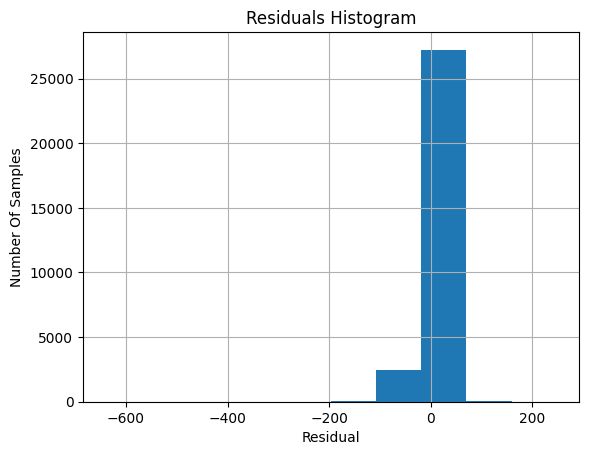

In [57]:
residuals.hist()
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Number Of Samples")
plt.show()

We can see that most of the residual values ​​are after the 0 on the X-axis. That is, the model often **overestimates** when it makes a prediction error.

Create two scatter plots to visualize the residuals (the difference between the true values and the predicted values) of a model, and compare them in two ways - absolute residuals and relative residuals (as a percentage):

Text(0.5, 1.0, 'Residuals (%)')

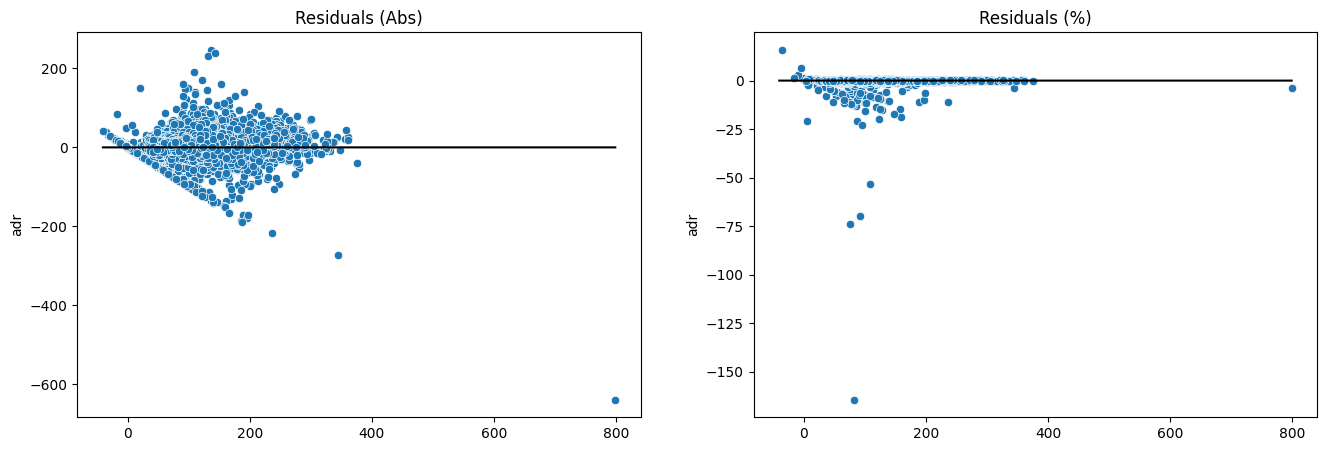

In [58]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x=y_pred,y=residuals,ax=ax[0])
sns.lineplot(x=y_pred,y=0,ax=ax[0],color='black')
ax[0].set_title("Residuals (Abs)")
sns.scatterplot(x=y_pred,y=residuals/y_test,ax=ax[1])
sns.lineplot(x=y_pred,y=0,ax=ax[1],color='black')
ax[1].set_title("Residuals (%)")

The first scatter plot shows the relationship between the predicted values
(y_pred) and the absolute residuals (y_test - y_pred).<br>
The black horizontal line at y=0 represents a reference line where there are no residuals (perfect predictions).<br>
We can see that most of the point around the 0-line, but The negative gradient of the points - line in the left side of the graph suggests that there might be increasing underestimation of predictions as the predicted values get higher. This could mean that for larger predictions, the model tends to systematically underpredict (as the residuals become negative as the prediction increases).<br><br>
The second scatter plot shows the relationship between the predicted values (y_pred) and the percentage residuals ((y_test - y_pred) / y_test).<br>
The black horizontal line at y=0 still represents no residual error (perfect predictions).<br>
We can see that most of the points are near zero on the Y-axis. it suggests that the relative errors (as percentages) are small for most of the predictions. This means that the model's predictions are close to the actual values in terms of percentage error. In addition, there are many points scattered below the zero line. this suggests that although we have seen that the model often errs in overestimation, its extreme errors are actually expressed in **underestimation**.

In [25]:
rel_res=residuals/y_test
rel_res=rel_res.abs()

How many time did our model achieve low estimation error (error less than 5%)?:

In [26]:
len(rel_res[rel_res<0.05])/len(rel_res)

0.304476011793085

How about more than 20%?

In [27]:
len(rel_res[rel_res>0.2])/len(rel_res)

0.1811176628249799

**Are some features sabotaging the model? How?**

Extract and display the feature importances of the trained XGBoost model, which provides insight into which features contributed the most to the model's predictions:

In [28]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Print feature importances
print("Feature importances:\n")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature} = {importance:.4f}")

Feature importances:

is_canceled = 0.0012
lead_time = 0.0038
arrival_date_year = 0.0146
arrival_date_week_number = 0.0141
arrival_date_day_of_month = 0.0030
stays_in_weekend_nights = 0.0171
stays_in_week_nights = 0.0048
adults = 0.0182
children = 0.0493
babies = 0.0001
is_repeated_guest = 0.0041
previous_cancellations = 0.0011
previous_bookings_not_canceled = 0.0023
booking_changes = 0.0299
agent = 0.0082
company = 0.0012
days_in_waiting_list = 0.0023
required_car_parking_spaces = 0.0030
total_of_special_requests = 0.0004
hotel_Resort Hotel = 0.0244
arrival_date_month_August = 0.0428
arrival_date_month_December = 0.0045
arrival_date_month_February = 0.0004
arrival_date_month_January = 0.0011
arrival_date_month_July = 0.0236
arrival_date_month_June = 0.0348
arrival_date_month_March = 0.0005
arrival_date_month_May = 0.0053
arrival_date_month_November = 0.0023
arrival_date_month_October = 0.0018
arrival_date_month_September = 0.0120
meal_FB = 0.0038
meal_HB = 0.0178
meal_SC = 0.0062
meal

Explain the model's predictions using SHAP, which provides insights into how the model's features contribute to the prediction for each data point:

In [31]:
import shap
shap_sample = X_train.sample(500)
explainer = shap.Explainer(xgb_model.predict, shap_sample)
shap_values = explainer(shap_sample)
df_processed.columns

PermutationExplainer explainer: 501it [07:32,  1.09it/s]


Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies',
       ...
       'reservation_status_date_2017-09-03',
       'reservation_status_date_2017-09-04',
       'reservation_status_date_2017-09-05',
       'reservation_status_date_2017-09-06',
       'reservation_status_date_2017-09-07',
       'reservation_status_date_2017-09-08',
       'reservation_status_date_2017-09-09',
       'reservation_status_date_2017-09-10',
       'reservation_status_date_2017-09-12',
       'reservation_status_date_2017-09-14'],
      dtype='object', length=1176)

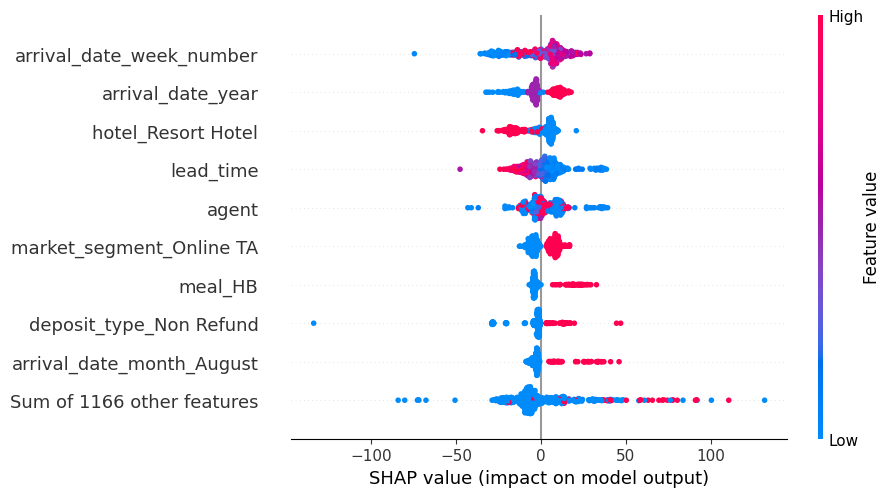

In [33]:
shap.plots.beeswarm(shap_values)

We can see that there are features that, when they receive a high value, the shap values ​​increase accordingly, as in arrival_date_year - the later the year, the average daily rate increases. On the other hand, there are features that maintain the opposite, such as lead_time - the smaller its values, the higher the average daily rate.

In [42]:
# Sample 500 samples from X_test
X_test_sampled = X_test.sample(500, random_state=42)  # Randomly select 500 samples
y_test_sampled = y_test.loc[X_test_sampled.index]  # Corresponding true values

# Create SHAP explainer using the model
test_explainer = shap.Explainer(xgb_model.predict, X_test_sampled)

# Get SHAP values for the sampled X_test
test_shap_values = test_explainer(X_test_sampled)

PermutationExplainer explainer: 501it [07:37,  1.08it/s]


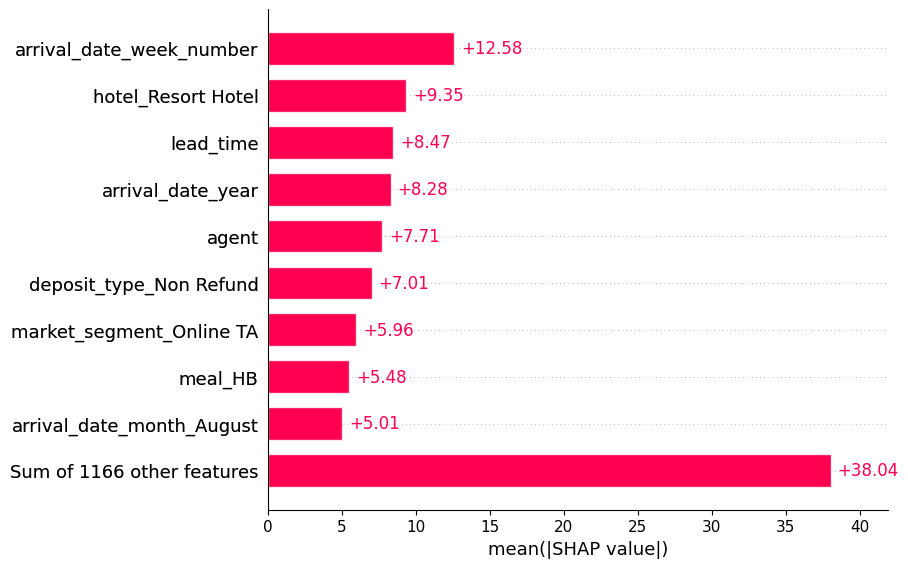

In [59]:
y_pred_sampled = xgb_model.predict(X_test_sampled)

# Calculate residuals (true value - predicted value)
sampled_residuals = y_test_sampled - y_pred_sampled

# Set a threshold for identifying high residuals (e.g., top 5% largest residuals)
threshold = np.percentile(np.abs(residuals), 70)  # 95th percentile as threshold

# Identify the indices of the samples with the largest residuals
high_residuals_mask = abs(sampled_residuals) > threshold
high_residual_indices = np.where(high_residuals_mask)[0]

# Filter the SHAP values for the samples with high residuals
erroneous_shap_values = shap.Explanation(
    values=test_shap_values.values[high_residual_indices],
    base_values=test_shap_values.base_values[high_residual_indices],
    data=test_shap_values.data[high_residual_indices],
    feature_names=test_shap_values.feature_names,
)

# Visualize the SHAP values for these erroneous samples
shap.plots.bar(erroneous_shap_values)


The features **arrival_date_week_number**, **hotel_Resort Hotel**, and **lead_time** have the largest average positive SHAP values, indicating that they are consistently contributing to higher predictions of the target variable.<br>
We can see that these features are among the most influential factors even in cases where the model's predictions are incorrect (i.e., high residuals). This suggests that errors in the model's predictions are heavily driven by these features, possibly due to unmodeled complexities or biases related to them.<br>

Interpretation of Errors:

* arrival_date_week_number:
The model might struggle to capture the relationship between certain weeks and their actual impact on the target variable (e.g., cancellations or bookings). For instance, unanticipated external events (e.g., holidays or unforeseen disruptions) in specific weeks could lead to higher errors.
* hotel_Resort Hotel:
The distinction between resort and non-resort hotels might introduce complexities not fully captured by the model. For example, resort hotels might have varying customer behaviors (e.g., last-minute cancellations) that the model doesn't account for.
* lead_time:
Errors could stem from an inability to accurately model the relationship between long lead times and cancellations. For example, the model may overestimate or underestimate the impact of long planning times on customer behavior.

We can see how these features affect the prediction can be seen in the incorrect predictions:

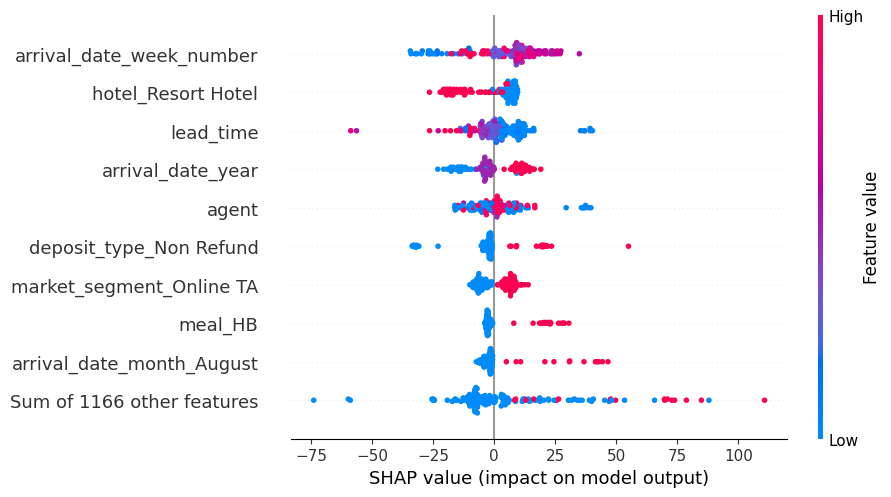

In [48]:
shap.plots.beeswarm(erroneous_shap_values)

**Are there commonalities between the erroneous samples?**

<Axes: >

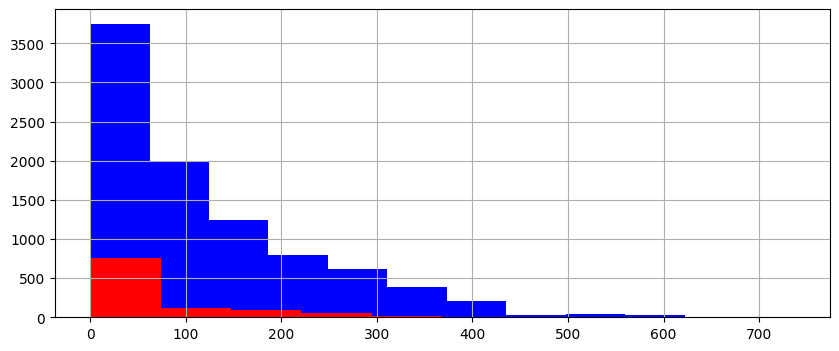

In [51]:
over_estimates = X_test.loc[rel_res[rel_res>0.5].index]
good_estimates = X_test.loc[rel_res[rel_res<0.05].index]
fig, ax = plt.subplots(figsize=(10,4))
good_estimates.lead_time.hist(ax=ax,color='blue')
over_estimates.lead_time.hist(ax=ax,color='red')

We can see that our overestimas contains bookings with lower lead time.<br>
This makes sense but is not always true.

Reference: ChatGPT